### Section 8 - Group by and Aggregation

In [22]:
import pandas as pd
import numpy as np

### Lecture - 194 - Section Introduction

In [23]:
games = pd.read_csv("D:\karan data\Data for Preprocessing\games_sales.csv")

In [24]:
games 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
4,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
...,...,...,...,...,...,...,...,...,...,...
3138,Bound By Flame,X360,2014.0,Role-Playing,NaN,0.00,0.01,0.00,0.00,0.01
3139,Mighty No. 9,XOne,2016.0,Platform,Deep Silver,0.01,0.00,0.00,0.00,0.01
3140,Resident Evil 4 HD,XOne,2016.0,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
3141,Farming 2017 - The Simulation,PS4,2016.0,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01


### Lecture - 195 & 196 - Simple Aggregations Review

In [25]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          3143 non-null   object 
 1   Platform      3143 non-null   object 
 2   Year          3088 non-null   float64
 3   Genre         3143 non-null   object 
 4   Publisher     3136 non-null   object 
 5   NA_Sales      3143 non-null   float64
 6   EU_Sales      3143 non-null   float64
 7   JP_Sales      3143 non-null   float64
 8   Other_Sales   3143 non-null   float64
 9   Global_Sales  3143 non-null   float64
dtypes: float64(6), object(4)
memory usage: 245.7+ KB


In [26]:
"""
GP['Year'] = pd.to_datetime(GP['Year'], format = '%Y') 
if we want a result like below
2010-01-01, 2013-01-01

"""

"\nGP['Year'] = pd.to_datetime(GP['Year'], format = '%Y') \nif we want a result like below\n2010-01-01, 2013-01-01\n\n"

In [27]:
games.Year= pd.to_datetime(games['Year'])

In [28]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          3143 non-null   object        
 1   Platform      3143 non-null   object        
 2   Year          3088 non-null   datetime64[ns]
 3   Genre         3143 non-null   object        
 4   Publisher     3136 non-null   object        
 5   NA_Sales      3143 non-null   float64       
 6   EU_Sales      3143 non-null   float64       
 7   JP_Sales      3143 non-null   float64       
 8   Other_Sales   3143 non-null   float64       
 9   Global_Sales  3143 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 245.7+ KB


In [29]:
games.select_dtypes(np.float64).sum()

NA_Sales        1173.30
EU_Sales         793.64
JP_Sales         107.06
Other_Sales      282.75
Global_Sales    2356.96
dtype: float64

In [30]:
games.select_dtypes(include='float').sum()

NA_Sales        1173.30
EU_Sales         793.64
JP_Sales         107.06
Other_Sales      282.75
Global_Sales    2356.96
dtype: float64

In [31]:
games.select_dtypes(include=['float', 'datetime64'])

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1970-01-01 00:00:00.000002010,14.97,4.94,0.24,1.67,21.82
1,1970-01-01 00:00:00.000002013,7.01,9.27,0.97,4.14,21.40
2,1970-01-01 00:00:00.000002013,9.63,5.31,0.06,1.38,16.38
3,1970-01-01 00:00:00.000002011,9.03,4.28,0.13,1.32,14.76
4,1970-01-01 00:00:00.000002010,9.67,3.73,0.11,1.13,14.64
...,...,...,...,...,...,...
3138,1970-01-01 00:00:00.000002014,0.00,0.01,0.00,0.00,0.01
3139,1970-01-01 00:00:00.000002016,0.01,0.00,0.00,0.00,0.01
3140,1970-01-01 00:00:00.000002016,0.01,0.00,0.00,0.00,0.01
3141,1970-01-01 00:00:00.000002016,0.00,0.01,0.00,0.00,0.01


### Lecture - 197 - conditional Aggregates

In [32]:
games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kinect Adventures!,X360,1970-01-01 00:00:00.000002010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,Grand Theft Auto V,PS3,1970-01-01 00:00:00.000002013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,Grand Theft Auto V,X360,1970-01-01 00:00:00.000002013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Call of Duty: Modern Warfare 3,X360,1970-01-01 00:00:00.000002011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
4,Call of Duty: Black Ops,X360,1970-01-01 00:00:00.000002010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
...,...,...,...,...,...,...,...,...,...,...
3138,Bound By Flame,X360,1970-01-01 00:00:00.000002014,Role-Playing,NaN,0.00,0.01,0.00,0.00,0.01
3139,Mighty No. 9,XOne,1970-01-01 00:00:00.000002016,Platform,Deep Silver,0.01,0.00,0.00,0.00,0.01
3140,Resident Evil 4 HD,XOne,1970-01-01 00:00:00.000002016,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
3141,Farming 2017 - The Simulation,PS4,1970-01-01 00:00:00.000002016,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01


In [33]:
games.Platform.unique()

array(['X360', 'PS3', 'PS4', 'XOne'], dtype=object)

In [34]:
games.loc[(games.Platform == 'X360') | (games.Platform == 'PS3')].sum(numeric_only=True)

NA_Sales         993.31
EU_Sales         624.29
JP_Sales          92.42
Other_Sales      227.47
Global_Sales    1937.80
dtype: float64

In [35]:
games.loc[(games.Platform == 'X360')].sum(numeric_only=True)

NA_Sales        601.05
EU_Sales        280.58
JP_Sales         12.43
Other_Sales      85.54
Global_Sales    979.96
dtype: float64

### Lecture - 199 - Groupby

In [36]:
games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kinect Adventures!,X360,1970-01-01 00:00:00.000002010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,Grand Theft Auto V,PS3,1970-01-01 00:00:00.000002013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,Grand Theft Auto V,X360,1970-01-01 00:00:00.000002013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Call of Duty: Modern Warfare 3,X360,1970-01-01 00:00:00.000002011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
4,Call of Duty: Black Ops,X360,1970-01-01 00:00:00.000002010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
...,...,...,...,...,...,...,...,...,...,...
3138,Bound By Flame,X360,1970-01-01 00:00:00.000002014,Role-Playing,NaN,0.00,0.01,0.00,0.00,0.01
3139,Mighty No. 9,XOne,1970-01-01 00:00:00.000002016,Platform,Deep Silver,0.01,0.00,0.00,0.00,0.01
3140,Resident Evil 4 HD,XOne,1970-01-01 00:00:00.000002016,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
3141,Farming 2017 - The Simulation,PS4,1970-01-01 00:00:00.000002016,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01


In [37]:
games.groupby('Platform').sum()

TypeError: datetime64 type does not support sum operations

### Lecture - 201 - Customizing Index To Group Mapping --- Imp

In [ ]:
Platform_Names = {
    'PS3' : 'PlayStation',
    'PS4' : 'PlayStation',
    'X360' : 'XBox',
    'XOne': 'XBox'
}

In [ ]:
Platform_Names

{'PS3': 'PlayStation', 'PS4': 'PlayStation', 'X360': 'XBox', 'XOne': 'XBox'}

In [ ]:
# Only numerical Data
Sales_Data = games.loc[:,['Platform', 'NA_Sales','EU_Sales', 'JP_Sales',	'Other_Sales']]

In [ ]:
Sales_Data.set_index('Platform')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
X360,14.97,4.94,0.24,1.67
PS3,7.01,9.27,0.97,4.14
X360,9.63,5.31,0.06,1.38
X360,9.03,4.28,0.13,1.32
X360,9.67,3.73,0.11,1.13
...,...,...,...,...
X360,0.00,0.01,0.00,0.00
XOne,0.01,0.00,0.00,0.00
XOne,0.01,0.00,0.00,0.00


In [ ]:
Sales_Data.set_index('Platform').groupby(Platform_Names).sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
PlayStation,489.06,467.41,94.29,185.29
XBox,684.24,326.23,12.77,97.46


### Lecture - 203 & 204 , Problems and Solutions


In [ ]:
games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kinect Adventures!,X360,1970-01-01,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,Grand Theft Auto V,PS3,1970-01-01,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,Grand Theft Auto V,X360,1970-01-01,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Call of Duty: Modern Warfare 3,X360,1970-01-01,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
4,Call of Duty: Black Ops,X360,1970-01-01,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
...,...,...,...,...,...,...,...,...,...,...
3138,Bound By Flame,X360,1970-01-01,Role-Playing,NaN,0.00,0.01,0.00,0.00,0.01
3139,Mighty No. 9,XOne,1970-01-01,Platform,Deep Silver,0.01,0.00,0.00,0.00,0.01
3140,Resident Evil 4 HD,XOne,1970-01-01,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
3141,Farming 2017 - The Simulation,PS4,1970-01-01,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01


In [ ]:
games.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=False).index

Index(['X360', 'PS3', 'PS4', 'XOne'], dtype='object', name='Platform')

In [ ]:
games.groupby('Platform')['NA_Sales'].sum().sort_values()

Platform
XOne     83.19
PS4      96.80
PS3     392.26
X360    601.05
Name: NA_Sales, dtype: float64

### Lecture - 206 - Handpicking Subgroups

In [ ]:
# Similar to "Having" Clause in SQL
games.groupby('Platform').get_group('PS3')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Grand Theft Auto V,PS3,1970-01-01,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
6,Call of Duty: Black Ops II,PS3,1970-01-01,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
9,Call of Duty: Modern Warfare 3,PS3,1970-01-01,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
10,Call of Duty: Black Ops,PS3,1970-01-01,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
14,Gran Turismo 5,PS3,1970-01-01,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77
...,...,...,...,...,...,...,...,...,...,...
3124,Hyperdimension Neptunia mk2,PS3,1970-01-01,Action,Nippon Ichi Software,0.00,0.01,0.00,0.00,0.01
3125,Shin Koihime Musou: Otome Taisen * Sangokushi ...,PS3,1970-01-01,Adventure,Views,0.00,0.00,0.01,0.00,0.01
3129,Muv-Luv Alternative,PS3,1970-01-01,Simulation,5pb,0.00,0.00,0.01,0.00,0.01
3132,Akatsuki no Goei Trinity,PS3,1970-01-01,Adventure,5pb,0.00,0.00,0.01,0.00,0.01


### Lecture - 207 - MutliIndex Grouping 

In [ ]:
games.groupby(['Genre','Platform'])['Global_Sales'].sum()

Genre         Platform
Action        PS3         307.88
              PS4          87.06
              X360        242.67
              XOne         33.79
Adventure     PS3          22.90
              PS4           4.70
              X360         15.23
              XOne          2.51
Fighting      PS3          51.70
              PS4           8.04
              X360         37.64
              XOne          2.31
Misc          PS3          47.85
              PS4           7.40
              X360         91.96
              XOne          6.86
Platform      PS3          30.33
              PS4           7.01
              X360         11.39
              XOne          0.81
Puzzle        PS3           0.60
              PS4           0.02
              X360          0.85
Racing        PS3          73.95
              PS4          11.53
              X360         65.99
              XOne          8.80
Role-Playing  PS3          75.30
              PS4          25.77
              X360  

In [ ]:
games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kinect Adventures!,X360,1970-01-01,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,Grand Theft Auto V,PS3,1970-01-01,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,Grand Theft Auto V,X360,1970-01-01,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Call of Duty: Modern Warfare 3,X360,1970-01-01,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
4,Call of Duty: Black Ops,X360,1970-01-01,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
...,...,...,...,...,...,...,...,...,...,...
3138,Bound By Flame,X360,1970-01-01,Role-Playing,NaN,0.00,0.01,0.00,0.00,0.01
3139,Mighty No. 9,XOne,1970-01-01,Platform,Deep Silver,0.01,0.00,0.00,0.00,0.01
3140,Resident Evil 4 HD,XOne,1970-01-01,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
3141,Farming 2017 - The Simulation,PS4,1970-01-01,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01


### lecture - 208 - Fine-Tuned Aggregates

In [ ]:
# group by Does not work with apply 
games.groupby(['Genre','Platform'])['Global_Sales'].apply(['sum', 'count'])

TypeError: unhashable type: 'list'

In [ ]:
games.groupby(['Genre','Platform'])['Global_Sales'].agg({'Global_Sales':['sum', 'count', 'std']}).sort_values(by=('Global_Sales', 'sum'), ascending=False)

SpecificationError: nested renamer is not supported

In [ ]:
games.groupby(['Genre', 'Platform']).agg({'Global_Sales': ['sum', 'count', 'std']}).sort_values(by=('Global_Sales', 'sum'), ascending=False)


Global_Sales                
                               sum count       std
Genre        Platform                             
Action       PS3            307.88   380  1.660116
Shooter      X360           278.55   203  2.685196
Action       X360           242.67   324  1.406772
Shooter      PS3            196.04   156  2.308557
Sports       X360           139.12   220  0.890439
             PS3            135.56   213  0.999043
Misc         X360            91.96   126  2.165301
Action       PS4             87.06   122  1.452652
Shooter      PS4             75.32    34  2.965431
Role-Playing PS3             75.30   119  1.004425
Racing       PS3             73.95    92  1.376301
Role-Playing X360            71.98    76  1.533177
Racing       X360            65.99   105  0.922865
Fighting     PS3             51.70    76  0.738275
Shooter      XOne            51.61    33  1.723269
Sports       PS4             50.07    43  1.805890
Misc         PS3             47.85   124  0.631139
Fighting     X360            37.64    65  0.626066
Action       XOne            33.79    68  0.823085
Platform     PS3             30.33    37  1.136235
Role-Playing PS4             25.77    47  1.180133
Sports       XOne            23.97    36  0.819067
Adventure    PS3             22.90    74  0.780451
             X360            15.23    47  0.887242
Simulation   X360            14.45    40  0.487575
Racing       PS4             11.53    17  0.804528
Platform     X360            11.39    24  0.441253
Simulation   PS3             10.79    31  0.444593
Strategy     X360            10.13    28  0.498078
Role-Playing XOne             9.48    13  1.099822
Racing       XOne             8.80    19  0.634053
Fighting     PS4              8.04    17  0.683152
Misc         PS4              7.40    15  1.005575
Platform     PS4              7.01    11  0.671671
Misc         XOne             6.86    15  0.574076
Strategy     PS3              4.94    24  0.223994
Adventure    PS4              4.70    19  0.378694
             XOne             2.51    12  0.372741
Fighting     XOne             2.31     7  0.462313
Puzzle       X360             0.85     7  0.095643
Platform     XOne             0.81     4  0.153052
Simulation   PS4              0.77     5  0.160094
Puzzle       PS3              0.60     3  0.196977
Simulation   XOne             0.54     3  0.165227
Strategy     PS4              0.41     5  0.067231
             XOne             0.38     3  0.094516
Puzzle       PS4              0.02     1       NaN

In [ ]:
games.groupby(['Genre', 'Platform']).agg({'Global_Sales': ['sum', 'count', 'std']}).sort_values(by=('Global_Sales', 'sum'), ascending=False).iloc[:10]


Global_Sales                
                               sum count       std
Genre        Platform                             
Action       PS3            307.88   380  1.660116
Shooter      X360           278.55   203  2.685196
Action       X360           242.67   324  1.406772
Shooter      PS3            196.04   156  2.308557
Sports       X360           139.12   220  0.890439
             PS3            135.56   213  0.999043
Misc         X360            91.96   126  2.165301
Action       PS4             87.06   122  1.452652
Shooter      PS4             75.32    34  2.965431
Role-Playing PS3             75.30   119  1.004425

In [ ]:
games.agg(['sum', 'count'], axis=0).select_dtypes(include = np.number)

,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
sum,NaN,NaN,1173.3,793.64,107.06,282.75,2356.96
count,3088.0,3136.0,3143.0,3143.00,3143.00,3143.00,3143.00


In [ ]:
# Apply with different calculation like Sum, Count, Std. does not works on group method.
games.apply(['sum', 'count'], axis=0).select_dtypes(include = np.number)

,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
sum,NaN,NaN,1173.3,793.64,107.06,282.75,2356.96
count,3088.0,3136.0,3143.0,3143.00,3143.00,3143.00,3143.00


### Lecture - 209 - Name Aggregation

In [ ]:
games.groupby(['Genre', 'Platform']).agg({'Global_Sales': ['sum', 'count']})\
     .rename({'sum': 'Total_Revenue', 'count': 'Number_of_Games'}, axis=1)

Global_Sales                
                      Total_Revenue Number_of_Games
Genre        Platform                              
Action       PS3             307.88             380
             PS4              87.06             122
             X360            242.67             324
             XOne             33.79              68
Adventure    PS3              22.90              74
             PS4               4.70              19
             X360             15.23              47
             XOne              2.51              12
Fighting     PS3              51.70              76
             PS4               8.04              17
             X360             37.64              65
             XOne              2.31               7
Misc         PS3              47.85             124
             PS4               7.40              15
             X360             91.96             126
             XOne              6.86              15
Platform     PS3              30.33              37
             PS4               7.01              11
             X360             11.39              24
             XOne              0.81               4
Puzzle       PS3               0.60               3
             PS4               0.02               1
             X360              0.85               7
Racing       PS3              73.95              92
             PS4              11.53              17
             X360             65.99             105
             XOne              8.80              19
Role-Playing PS3              75.30             119
             PS4              25.77              47
             X360             71.98              76
             XOne              9.48              13
Shooter      PS3             196.04             156
             PS4              75.32              34
             X360            278.55             203
             XOne             51.61              33
Simulation   PS3              10.79              31
             PS4               0.77               5
             X360             14.45              40
             XOne              0.54               3
Sports       PS3             135.56             213
             PS4              50.07              43
             X360            139.12             220
             XOne             23.97              36
Strategy     PS3               4.94              24
             PS4               0.41               5
             X360             10.13              28
             XOne              0.38               3

In [ ]:
games.head(2)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kinect Adventures!,X360,1970-01-01,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,Grand Theft Auto V,PS3,1970-01-01,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40


In [ ]:
games.groupby(['Genre','Platform']).agg(
    Total_Revenue = ('Global_Sales','sum'),
    Count = ('Global_Sales', 'count')
    )

Total_Revenue  Count
Genre        Platform                      
Action       PS3              307.88    380
             PS4               87.06    122
             X360             242.67    324
             XOne              33.79     68
Adventure    PS3               22.90     74
             PS4                4.70     19
             X360              15.23     47
             XOne               2.51     12
Fighting     PS3               51.70     76
             PS4                8.04     17
             X360              37.64     65
             XOne               2.31      7
Misc         PS3               47.85    124
             PS4                7.40     15
             X360              91.96    126
             XOne               6.86     15
Platform     PS3               30.33     37
             PS4                7.01     11
             X360              11.39     24
             XOne               0.81      4
Puzzle       PS3                0.60      3
             PS4                0.02      1
             X360               0.85      7
Racing       PS3               73.95     92
             PS4               11.53     17
             X360              65.99    105
             XOne               8.80     19
Role-Playing PS3               75.30    119
             PS4               25.77     47
             X360              71.98     76
             XOne               9.48     13
Shooter      PS3              196.04    156
             PS4               75.32     34
             X360             278.55    203
             XOne              51.61     33
Simulation   PS3               10.79     31
             PS4                0.77      5
             X360              14.45     40
             XOne               0.54      3
Sports       PS3              135.56    213
             PS4               50.07     43
             X360             139.12    220
             XOne              23.97     36
Strategy     PS3                4.94     24
             PS4                0.41      5
             X360              10.13     28
             XOne               0.38      3

In [ ]:
games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kinect Adventures!,X360,1970-01-01,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,Grand Theft Auto V,PS3,1970-01-01,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,Grand Theft Auto V,X360,1970-01-01,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Call of Duty: Modern Warfare 3,X360,1970-01-01,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
4,Call of Duty: Black Ops,X360,1970-01-01,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
...,...,...,...,...,...,...,...,...,...,...
3138,Bound By Flame,X360,1970-01-01,Role-Playing,NaN,0.00,0.01,0.00,0.00,0.01
3139,Mighty No. 9,XOne,1970-01-01,Platform,Deep Silver,0.01,0.00,0.00,0.00,0.01
3140,Resident Evil 4 HD,XOne,1970-01-01,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
3141,Farming 2017 - The Simulation,PS4,1970-01-01,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01


In [ ]:
games.

In [ ]:
games.groupby(['Genre', 'Platform']).agg({'Global_Sales': 'sum', 'EU_Sales': 'mean'})\
     .rename({'Global_Sales': 'Total_Revenue', 'EU_Sales': 'Mean'}, axis=1)

Total_Revenue      Mean
Genre        Platform                         
Action       PS3              307.88  0.291105
             PS4               87.06  0.313033
             X360             242.67  0.237068
             XOne              33.79  0.168676
Adventure    PS3               22.90  0.109865
             PS4                4.70  0.115263
             X360              15.23  0.103404
             XOne               2.51  0.090000
Fighting     PS3               51.70  0.193289
             PS4                8.04  0.160588
             X360              37.64  0.137231
             XOne               2.31  0.074286
Misc         PS3               47.85  0.136452
             PS4                7.40  0.202000
             X360              91.96  0.163016
             XOne               6.86  0.121333
Platform     PS3               30.33  0.307568
             PS4                7.01  0.301818
             X360              11.39  0.174583
             XOne               0.81  0.072500
Puzzle       PS3                0.60  0.016667
             PS4                0.02  0.020000
             X360               0.85  0.005714
Racing       PS3               73.95  0.368043
             PS4               11.53  0.418824
             X360              65.99  0.246667
             XOne               8.80  0.218947
Role-Playing PS3               75.30  0.166303
             PS4               25.77  0.224468
             X360              71.98  0.244211
             XOne               9.48  0.235385
Shooter      PS3              196.04  0.481667
             PS4               75.32  0.975000
             X360             278.55  0.377291
             XOne              51.61  0.462727
Simulation   PS3               10.79  0.121935
             PS4                0.77  0.074000
             X360              14.45  0.100750
             XOne               0.54  0.070000
Sports       PS3              135.56  0.225446
             PS4               50.07  0.532093
             X360             139.12  0.170455
             XOne              23.97  0.213056
Strategy     PS3                4.94  0.055417
             PS4                0.41  0.030000
             X360              10.13  0.094286
             XOne               0.38  0.033333

In [ ]:
games.groupby(['Genre', 'Platform']).agg({'Global_Sales': ['sum', 'mean', 'std']})\
     .rename({'sum': 'Total_Revenue', 'mean': 'Mean', 'std': 'Standard_Deviation'}, axis=1)\
     .sort_values(by=('Global_Sales' ,'Total_Revenue'), ascending=False)

Global_Sales                             
                      Total_Revenue      Mean Standard_Deviation
Genre        Platform                                           
Action       PS3             307.88  0.810211           1.660116
Shooter      X360            278.55  1.372167           2.685196
Action       X360            242.67  0.748981           1.406772
Shooter      PS3             196.04  1.256667           2.308557
Sports       X360            139.12  0.632364           0.890439
             PS3             135.56  0.636432           0.999043
Misc         X360             91.96  0.729841           2.165301
Action       PS4              87.06  0.713607           1.452652
Shooter      PS4              75.32  2.215294           2.965431
Role-Playing PS3              75.30  0.632773           1.004425
Racing       PS3              73.95  0.803804           1.376301
Role-Playing X360             71.98  0.947105           1.533177
Racing       X360             65.99  0.628476           0.922865
Fighting     PS3              51.70  0.680263           0.738275
Shooter      XOne             51.61  1.563939           1.723269
Sports       PS4              50.07  1.164419           1.805890
Misc         PS3              47.85  0.385887           0.631139
Fighting     X360             37.64  0.579077           0.626066
Action       XOne             33.79  0.496912           0.823085
Platform     PS3              30.33  0.819730           1.136235
Role-Playing PS4              25.77  0.548298           1.180133
Sports       XOne             23.97  0.665833           0.819067
Adventure    PS3              22.90  0.309459           0.780451
             X360             15.23  0.324043           0.887242
Simulation   X360             14.45  0.361250           0.487575
Racing       PS4              11.53  0.678235           0.804528
Platform     X360             11.39  0.474583           0.441253
Simulation   PS3              10.79  0.348065           0.444593
Strategy     X360             10.13  0.361786           0.498078
Role-Playing XOne              9.48  0.729231           1.099822
Racing       XOne              8.80  0.463158           0.634053
Fighting     PS4               8.04  0.472941           0.683152
Misc         PS4               7.40  0.493333           1.005575
Platform     PS4               7.01  0.637273           0.671671
Misc         XOne              6.86  0.457333           0.574076
Strategy     PS3               4.94  0.205833           0.223994
Adventure    PS4               4.70  0.247368           0.378694
             XOne              2.51  0.209167           0.372741
Fighting     XOne              2.31  0.330000           0.462313
Puzzle       X360              0.85  0.121429           0.095643
Platform     XOne              0.81  0.202500           0.153052
Simulation   PS4               0.77  0.154000           0.160094
Puzzle       PS3               0.60  0.200000           0.196977
Simulation   XOne              0.54  0.180000           0.165227
Strategy     PS4               0.41  0.082000           0.067231
             XOne              0.38  0.126667           0.094516
Puzzle       PS4               0.02  0.020000                NaN

### Lecture - 210 - Filter Method 

In [ ]:
games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kinect Adventures!,X360,1970-01-01,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,Grand Theft Auto V,PS3,1970-01-01,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,Grand Theft Auto V,X360,1970-01-01,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Call of Duty: Modern Warfare 3,X360,1970-01-01,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
4,Call of Duty: Black Ops,X360,1970-01-01,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
...,...,...,...,...,...,...,...,...,...,...
3138,Bound By Flame,X360,1970-01-01,Role-Playing,NaN,0.00,0.01,0.00,0.00,0.01
3139,Mighty No. 9,XOne,1970-01-01,Platform,Deep Silver,0.01,0.00,0.00,0.00,0.01
3140,Resident Evil 4 HD,XOne,1970-01-01,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
3141,Farming 2017 - The Simulation,PS4,1970-01-01,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01


In [ ]:
games.groupby(['Genre', 'Publisher']).filter(games.NA_Sales.sum())

TypeError: 'numpy.float64' object is not callable

In [ ]:
games.NA_Sales.sum()

True

In [ ]:
games[games.NA_Sales>9]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kinect Adventures!,X360,1970-01-01,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
2,Grand Theft Auto V,X360,1970-01-01,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Call of Duty: Modern Warfare 3,X360,1970-01-01,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
4,Call of Duty: Black Ops,X360,1970-01-01,Shooter,Activision,9.67,3.73,0.11,1.13,14.64


## Doubt

In [ ]:
games.groupby(['Publisher', 'Genre']).filter(lambda sg: sg['NA_Sales'].sum()>50) ## doubt

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
3,Call of Duty: Modern Warfare 3,X360,1970-01-01,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
4,Call of Duty: Black Ops,X360,1970-01-01,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
5,Call of Duty: Black Ops 3,PS4,1970-01-01,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
6,Call of Duty: Black Ops II,PS3,1970-01-01,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
7,Call of Duty: Black Ops II,X360,1970-01-01,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
...,...,...,...,...,...,...,...,...,...,...
2908,Cabela's Big Game Hunter: Pro Hunts,X360,1970-01-01,Shooter,Activision,0.02,0.00,0.00,0.00,0.03
3012,Call of Duty: Modern Warfare Trilogy,PS3,1970-01-01,Shooter,Activision,0.00,0.01,0.00,0.00,0.02
3033,NHL 16,X360,1970-01-01,Sports,Electronic Arts,0.00,0.02,0.00,0.00,0.02
3035,Call of Duty: Modern Warfare Trilogy,X360,1970-01-01,Shooter,Activision,0.01,0.01,0.00,0.00,0.02


In [ ]:
games.groupby(['Genre', 'Publisher']).agg({'NA_Sales': 'sum'})

NA_Sales
Genre    Publisher                     
Action   505 Games                 0.84
         Abylight                  0.07
         Ackkstudios               0.00
         Acquire                   0.08
         Activision               24.14
...                                 ...
Strategy Square Enix               0.23
         Takara Tomy               0.08
         Take-Two Interactive      1.69
         Tecmo Koei                0.03
         Ubisoft                   1.20

[422 rows x 1 columns]

In [ ]:
games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kinect Adventures!,X360,1970-01-01,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,Grand Theft Auto V,PS3,1970-01-01,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,Grand Theft Auto V,X360,1970-01-01,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Call of Duty: Modern Warfare 3,X360,1970-01-01,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
4,Call of Duty: Black Ops,X360,1970-01-01,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
...,...,...,...,...,...,...,...,...,...,...
3138,Bound By Flame,X360,1970-01-01,Role-Playing,NaN,0.00,0.01,0.00,0.00,0.01
3139,Mighty No. 9,XOne,1970-01-01,Platform,Deep Silver,0.01,0.00,0.00,0.00,0.01
3140,Resident Evil 4 HD,XOne,1970-01-01,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
3141,Farming 2017 - The Simulation,PS4,1970-01-01,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01


### Lecture - 211 - GroupBy Transformation

In [ ]:
games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kinect Adventures!,X360,1970-01-01,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,Grand Theft Auto V,PS3,1970-01-01,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,Grand Theft Auto V,X360,1970-01-01,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Call of Duty: Modern Warfare 3,X360,1970-01-01,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
4,Call of Duty: Black Ops,X360,1970-01-01,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
...,...,...,...,...,...,...,...,...,...,...
3138,Bound By Flame,X360,1970-01-01,Role-Playing,NaN,0.00,0.01,0.00,0.00,0.01
3139,Mighty No. 9,XOne,1970-01-01,Platform,Deep Silver,0.01,0.00,0.00,0.00,0.01
3140,Resident Evil 4 HD,XOne,1970-01-01,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
3141,Farming 2017 - The Simulation,PS4,1970-01-01,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01


In [ ]:
games_relative = games.loc[:, ['Name','Platform', 'Genre', 'Global_Sales', 'NA_Sales']]

In [ ]:
games_relative.set_index(['Name', 'Platform']).groupby('Genre').transform(lambda x : (x-x.mean())/x.std())\
              .sort_values(by='Global_Sales', ascending=False) 

,,Global_Sales,NA_Sales
Name,Platform,,
Grand Theft Auto V,PS3,13.831175,9.558020
Kinect Adventures!,X360,13.814162,14.280179
Grand Theft Auto V,X360,10.468663,13.317324
Gran Turismo 5,PS3,9.159261,6.179307
Grand Theft Auto V,PS4,7.521441,4.952155
...,...,...,...
Dragon Ball Z for Kinect,X360,-0.872762,-0.754265
Nitroplus Blasterz: Heroines Infinite Duel,PS3,-0.872762,-0.778337
Battle Fantasia,PS3,-0.872762,-0.778337


In [ ]:
games_demo = games.loc[:, ['Genre','Global_Sales', 'NA_Sales']]

In [ ]:
games_demo.groupby('Genre').transform(lambda x : (x-x.mean())/(x.std()))

,Global_Sales,NA_Sales
0,13.814162,14.280179
1,13.831175,9.558020
2,10.468663,13.317324
3,5.301112,5.867722
4,5.253454,6.320803
...,...,...
3138,-0.576944,-0.521268
3139,-0.728965,-0.664397
3140,-0.556808,-0.517893
3141,-0.728496,-0.742375


In [ ]:
games_relative.NA_Sales.mean()

0.3733057588291348

In [ ]:
games_relative.Global_Sales.min()

0.01

### Lecture - 212 - Bonus - Groupby with Apply

In [ ]:
def sales_detail(sg):
    level = 'Solid' if sg.EU_Sales.sum()>50 else 'weak'
    variablility = 'volatile' if sg.EU_Sales.std()/sg.EU_Sales.mean()>2 else 'steady'
    return (variablility, level + ' sales')

In [ ]:
PS3 = games.loc[:, ['Name', 'Platform','Genre','EU_Sales']]
PS3

,Name,Platform,Genre,EU_Sales
0,Kinect Adventures!,X360,Misc,4.94
1,Grand Theft Auto V,PS3,Action,9.27
2,Grand Theft Auto V,X360,Action,5.31
3,Call of Duty: Modern Warfare 3,X360,Shooter,4.28
4,Call of Duty: Black Ops,X360,Shooter,3.73
...,...,...,...,...
3138,Bound By Flame,X360,Role-Playing,0.01
3139,Mighty No. 9,XOne,Platform,0.00
3140,Resident Evil 4 HD,XOne,Shooter,0.00
3141,Farming 2017 - The Simulation,PS4,Simulation,0.01


In [ ]:
PS3.groupby('Genre').apply(sales_detail)

Genre
Action          (volatile, Solid sales)
Adventure        (volatile, weak sales)
Fighting           (steady, weak sales)
Misc             (volatile, weak sales)
Platform           (steady, weak sales)
Puzzle             (steady, weak sales)
Racing            (steady, Solid sales)
Role-Playing    (volatile, Solid sales)
Shooter           (steady, Solid sales)
Simulation         (steady, weak sales)
Sports          (volatile, Solid sales)
Strategy           (steady, weak sales)
dtype: object

In [ ]:
games.groupby('Genre').apply(sales_detail)

Genre
Action          (volatile, Solid sales)
Adventure        (volatile, weak sales)
Fighting           (steady, weak sales)
Misc             (volatile, weak sales)
Platform           (steady, weak sales)
Puzzle             (steady, weak sales)
Racing            (steady, Solid sales)
Role-Playing    (volatile, Solid sales)
Shooter           (steady, Solid sales)
Simulation         (steady, weak sales)
Sports          (volatile, Solid sales)
Strategy           (steady, weak sales)
dtype: object

In [ ]:
## IPL Data Practice
import pandas as pd

# Create a sample DataFrame
data = {
    'Year': [2020, 2020, 2021, 2021, 2022, 2022],
    'toss_decision': ['bat', 'field', 'bat', 'field', 'bat', 'field'],
    'match_result': ['win', 'lose', 'win', 'win', 'lose', 'lose']
}

match_data = pd.DataFrame(data)

# Grouping the DataFrame by 'Year' and 'toss_decision' and counting the occurrences
df = match_data.groupby(['Year', 'toss_decision']).size()

# Display the result
print(df)


Year  toss_decision
2020  bat              1
      field            1
2021  bat              1
      field            1
2022  bat              1
      field            1
dtype: int64


In [ ]:
df.reset_index()

,Year,toss_decision,0
0,2020,bat,1
1,2020,field,1
2,2021,bat,1
3,2021,field,1
4,2022,bat,1
5,2022,field,1


         https://www.udemy.com/course/python-data-analysis-visualization/learn/lecture/29823142#overview

In [ ]:

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          3143 non-null   object        
 1   Platform      3143 non-null   object        
 2   Year          3088 non-null   datetime64[ns]
 3   Genre         3143 non-null   object        
 4   Publisher     3136 non-null   object        
 5   NA_Sales      3143 non-null   float64       
 6   EU_Sales      3143 non-null   float64       
 7   JP_Sales      3143 non-null   float64       
 8   Other_Sales   3143 non-null   float64       
 9   Global_Sales  3143 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 245.7+ KB


In [40]:
Genre_EU = games.loc[: , ['Genre', 'EU_Sales']]

In [41]:
Genre_EU

,Genre,EU_Sales
0,Misc,4.94
1,Action,9.27
2,Action,5.31
3,Shooter,4.28
4,Shooter,3.73
...,...,...
3138,Role-Playing,0.01
3139,Platform,0.00
3140,Shooter,0.00
3141,Simulation,0.01


In [42]:
def difference (x):
    Diff = x.max() - x.mean()
    return Diff

In [43]:

 Genre_EU_Cal = Genre_EU.groupby('Genre').agg(max_value=('EU_Sales', 'max'),
                                              mean_value=('EU_Sales', 'mean'),
                                              difference=('EU_Sales', difference))



In [ ]:
Genre_EU_Cal

EU_Sales                      
             max_value mean_value difference
Genre                                       
Action            9.27   0.265201   9.004799
Adventure         2.00   0.106974   1.893026
Fighting          1.06   0.162788   0.897212
Misc              4.94   0.151107   4.788893
Platform          2.05   0.252368   1.797632
Puzzle            0.05   0.010000   0.040000
Racing            4.88   0.304893   4.575107
Role-Playing      3.15   0.203765   2.946235
Shooter           5.88   0.469836   5.410164
Simulation        0.97   0.106203   0.863797
Sports            6.06   0.226699   5.833301
Strategy          0.82   0.070333   0.749667

In [ ]:
Genre_EU

,Genre,EU_Sales
0,Misc,4.94
1,Action,9.27
2,Action,5.31
3,Shooter,4.28
4,Shooter,3.73
...,...,...
3138,Role-Playing,0.01
3139,Platform,0.00
3140,Shooter,0.00
3141,Simulation,0.01


In [ ]:
games.head(2)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kinect Adventures!,X360,1970-01-01,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,Grand Theft Auto V,PS3,1970-01-01,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40


In [ ]:
games['Publisher'].size

3143

In [ ]:
games['Publisher'].count()

3136

In [ ]:
games['Publisher'].size - games['Publisher'].count()

7

In [ ]:
def Count_Null (sg):
    return sg.size - sg.count()

In [ ]:
games.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False)

Publisher
Electronic Arts           434.41
Activision                349.22
Take-Two Interactive      218.08
Ubisoft                   201.98
Microsoft Game Studios    190.56
                           ...  
UIG Entertainment           0.01
ChunSoft                    0.01
Kaga Create                 0.01
Epic Games                  0.01
Ongakukan                   0.01
Name: Global_Sales, Length: 155, dtype: float64

In [ ]:
games.groupby(['Publisher'])['Global_Sales'].agg(Count_Null)

Publisher
49Games              0
505 Games            0
5pb                  0
Abylight             0
Ackkstudios          0
                    ..
Yacht Club Games     0
Yeti                 0
Zoo Games            0
Zushi Games          0
bitComposer Games    0
Name: Global_Sales, Length: 155, dtype: int64

In [ ]:
games.groupby(['Publisher'])['Global_Sales'].agg(Cnt = Count_Null)

,Cnt
Publisher,
49Games,0
505 Games,0
5pb,0
Abylight,0
Ackkstudios,0
...,...
Yacht Club Games,0
Yeti,0
Zoo Games,0


In [38]:
Genre_EU_cal

NameError: name 'Genre_EU_cal' is not defined

In [45]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Low Difference'}, ylabel='Genre'>

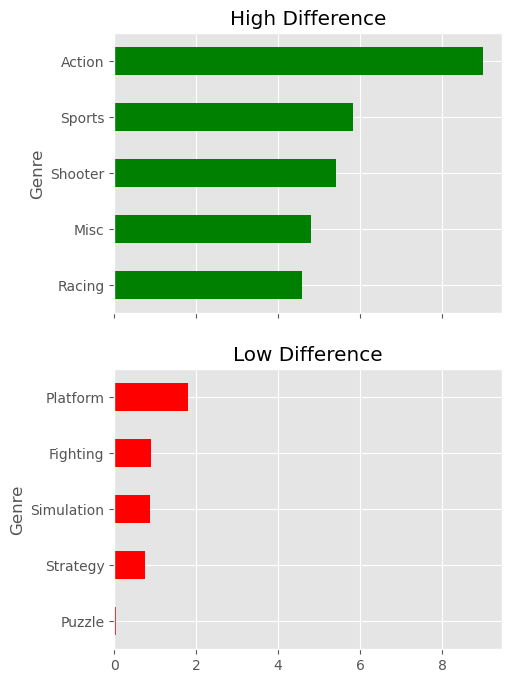

In [ ]:
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1, figsize=(5,8), sharex = True)
Genre_EU_Cal['difference'].nlargest(5).sort_values(ascending=True).plot(
    kind = 'barh',
    ax = axs[0],
    color = 'green',
    title = 'High Difference'
    )
Genre_EU_Cal['difference'].nsmallest(5).sort_values(ascending=True).plot(
    kind = 'barh',
    ax = axs[1],
    color = 'red',
    title = 'Low Difference'
    )

In [47]:
plt.style.use("seaborn")

C:\Users\Karan Narula\AppData\Local\Temp\ipykernel_2000\1490283864.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


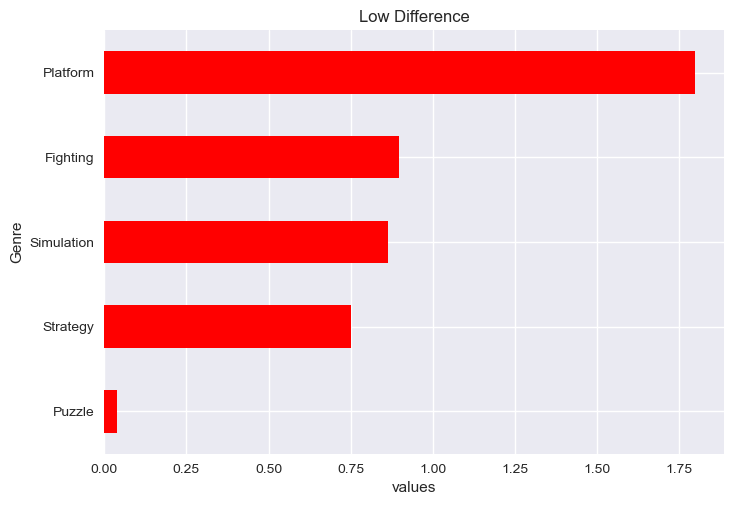

In [48]:

Genre_EU_Cal['difference'].nsmallest(5).sort_values(ascending=True).plot(
    kind = 'barh',
    color = 'red',
    title = 'Low Difference'
    )

plt.xlabel('values')
plt.show()

In [ ]:
games.groupby(['Publisher'])['Global_Sales'].sum().sort_values(by = 'Global_Sales', ascending=False)

TypeError: Series.sort_values() got an unexpected keyword argument 'by'

In [ ]:
# Put extra bracket in 'Global_Sales'
games.groupby(['Publisher'])[['Global_Sales']].sum().sort_values(by = 'Global_Sales', ascending=False)

,Global_Sales
Publisher,
Electronic Arts,434.41
Activision,349.22
Take-Two Interactive,218.08
Ubisoft,201.98
Microsoft Game Studios,190.56
...,...
UIG Entertainment,0.01
ChunSoft,0.01
Kaga Create,0.01


In [ ]:
housing_data = pd.read_csv('D:\karan data\Data for Preprocessing\housing_data (Matplotlib).csv')

In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622339 entries, 0 to 622338
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   region_name               622339 non-null  object 
 1   period_begin              622339 non-null  object 
 2   period_end                622339 non-null  object 
 3   total_homes_sold          567839 non-null  float64
 4   inventory                 616247 non-null  float64
 5   active_listings           616905 non-null  float64
 6   age_of_inventory          616247 non-null  float64
 7   median_active_list_price  616513 non-null  float64
 8   months_of_supply          561319 non-null  float64
dtypes: float64(6), object(3)
memory usage: 42.7+ MB


In [ ]:
housing_data['period_begin'] = pd.to_datetime(housing_data['period_begin'])

C:\Users\Karan Narula\AppData\Local\Temp\ipykernel_29732\349181167.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  housing_data['period_begin'] = pd.to_datetime(housing_data['period_begin'])


In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622339 entries, 0 to 622338
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   region_name               622339 non-null  object        
 1   period_begin              622339 non-null  datetime64[ns]
 2   period_end                622339 non-null  object        
 3   total_homes_sold          567839 non-null  float64       
 4   inventory                 616247 non-null  float64       
 5   active_listings           616905 non-null  float64       
 6   age_of_inventory          616247 non-null  float64       
 7   median_active_list_price  616513 non-null  float64       
 8   months_of_supply          561319 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 42.7+ MB


In [ ]:
housing_data['Month'] = housing_data['period_begin'].dt.month

In [ ]:
housing_data.groupby(['region_name', 'Month']).agg(Inventory = ('inventory', 'sum')).sort_values(by =['region_name','Month'], ascending = [False,True])

Inventory
region_name          Month           
Zavala County, TX    1           78.0
                     2           65.0
                     3           72.0
                     4           73.0
                     5           54.0
...                               ...
Abbeville County, SC 8          703.0
                     9          657.0
                     10         631.0
                     11         564.0
                     12         562.0

[28579 rows x 1 columns]

In [ ]:
housing_data.groupby(['region_name', 'Month']).agg(Inventory = ('inventory', 'sum')).sort_values(by =['Month'], ascending = [True])

,,Inventory
region_name,Month,
"Abbeville County, SC",1,690.0
"White County, IN",1,1838.0
"Stephenson County, IL",1,1825.0
"Camden County, NJ",1,52942.0
"Lake of the Woods County, MN",1,955.0
...,...,...
"Madison County, IA",12,870.0
"Donley County, TX",12,11.0
"Spalding County, GA",12,4657.0


In [ ]:
'''
import pandas as pd

Transaction  = pd.read_csv('D:\\karan data\\Data for Preprocessing\\retail\\transactions.csv')
Transaction.info()
Transaction.info()
Transaction['date'] = pd.to_datetime(Transaction['date'])
Transaction['Month'] = Transaction['date'].dt.month
Transaction.head(3)
Transaction.groupby(['store_nbr', 'Month'])[['transactions']].sum().sort_values(by = ['Month', 'transactions'], ascending=[True, False])


output :

		transactions
store_nbr	Month	
44	1	628438
47	1	568824
45	1	538370
46	1	522763
3	1	463260
...	...	...
32	12	86167
21	12	84128
42	12	76741
29	12	76627
22	12	50650

 '''

"\nimport pandas as pd\n\nTransaction  = pd.read_csv('D:\\karan data\\Data for Preprocessing\\retail\\transactions.csv')\nTransaction.info()\nTransaction.info()\nTransaction['date'] = pd.to_datetime(Transaction['date'])\nTransaction['Month'] = Transaction['date'].dt.month\nTransaction.head(3)\nTransaction.groupby(['store_nbr', 'Month'])[['transactions']].sum().sort_values(by = ['Month', 'transactions'], ascending=[True, False])\n\n\noutput :\n "